## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree


## Loading the dataset

In [3]:
loan = pd.read_csv('Loan_Modelling.csv')
data=loan.copy()

In [4]:
#first 5 columns
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
# checking shape of the data
print("There are", data.shape[0], 'rows and', data.shape[1], "columns.")

There are 5000 rows and 14 columns.


## Data Overview
* Observations
* Sanity checks

In [6]:
#Data information analysis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
data.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


- **Age** : Average age is 45, range from 23-67
- **Experience**: Average experience is 20 years, we see negative unrealistic values as low.
- **Income**: Average income price is 73K dollars, median 64K dollars, raneg of 8K to 224K dollars There is a huge difference between the maximum value and the 75% percentile of the data which indicates there might be outliers present in this column.
- **Family**: Range 1 - 4 with average 2
- **CCAVG**: Range 0 to 10K dollars, mean being 1.95K dollars, varied spending 
- **Education**: Families tend to be Advance/Graduate
- **Mortgage**: Average = 56K dollars and has a range of 0 to 635K. There is a huge difference between the maximum value and the 75% percentile of the data which indicates there might be outliers present in this column.
- **Security Account**: Average = 0.104, few of customers having securities accounts.
- **CD Account**: Average = 0.0604, few of customers having Certificate of Deposit accounts.
- **Credit Card**: 29.4% have have a credit card with bank

In [8]:
#Check for missing data points
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [9]:
data.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64

In [10]:
median_experience = data.loc[data['Experience'] >= 0, 'Experience'].median()
data.loc[data['Experience'] < 0, 'Experience'] = median_experience
(data['Experience']<=0).sum()

66

In [11]:
data.duplicated().sum()

0

- No null/duplicate data, data checks out in unique for amount of different answers in each column.
- There are 14 columns and 5000 rows of data, 
    - Most data points being an integer with one float/decimal category.
- Experience should not have negative values, I chamged experience to median for 66 rows.
    - Conducted instead of removal dur to large data set and few negative numbers.


## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

## Data Preprocessing
* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [12]:
# List of categorical and numerical variables
categorical_variables = ['Education', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']
numerical_variables = ['Age','Experience','Income','Family','CCAvg','Mortgage']
#id/zip code not included. 

In [13]:
for col in categorical_variables:
    upercentage = (data[col].nunique() / len(data)) * 100


for col in numerical_variables:
    upercentage = (data[col].nunique() / len(data)) * 100
    #All add up to 5000 rows

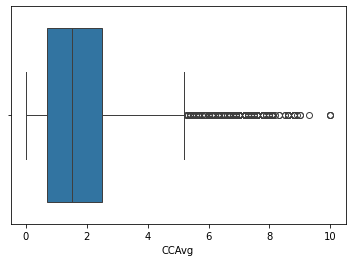

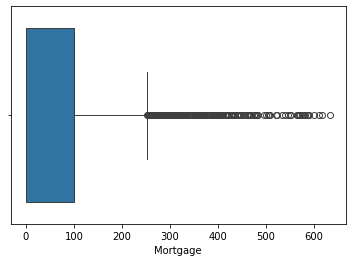

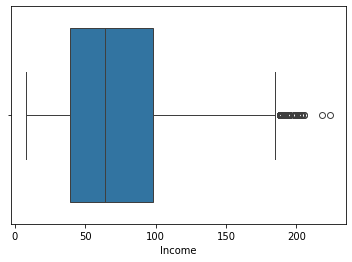

In [14]:
# visualizing the CCAvg after outlier treatment
sns.boxplot(data=data,x='CCAvg')
plt.show()

# visualizing the Mortgage after outlier treatment
sns.boxplot(data=data,x='Mortgage')
plt.show()

# visualizing the Income after outlier treatment
sns.boxplot(data=data,x='Income')
plt.show()

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

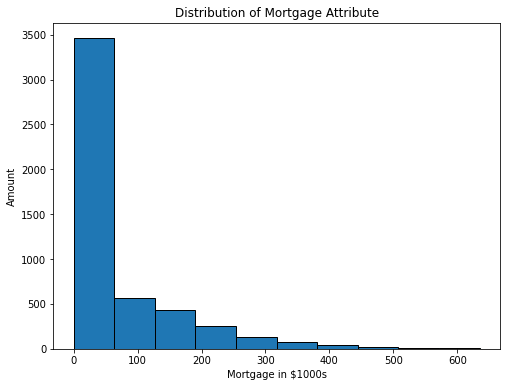

In [15]:
#1. Histogram to detect distribution of Mortgage
plt.figure(figsize=(8,6))
plt.hist(data['Mortgage'], bins=10,edgecolor='k')
plt.title('Distribution of Mortgage Attribute')
plt.xlabel('Mortgage in $1000s')
plt.ylabel('Amount')
plt.show()


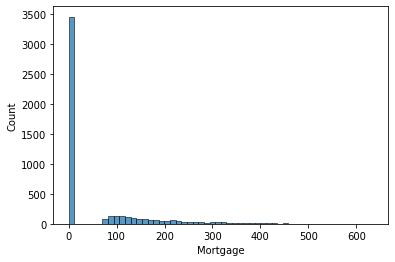

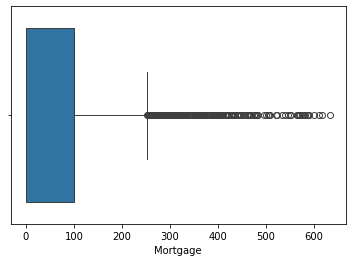

In [16]:
#1 Histogram / Boxplot for mortgage
sns.histplot(x=data['Mortgage'])
plt.show()
sns.boxplot(x=data['Mortgage'])
plt.show()

Histogram:
- Most customers have very low or no mortgage.
- A few customers have very high mortgage amounts, creating a long tail (right-skewed distribution).

Boxplot:
- Outliers are visible with mortgage values above 300K.
- Large amount of lower mortgages vs higher having a few.

In [17]:
#2. Count the number of customers who have credit cards
customer_CC = data['CreditCard'].sum()
print('#2 The amount of people who have a credit card is ',customer_CC)

#2 The amount of people who have a credit card is  1470


In [18]:
# 3. Calculate correlations with 'Personal_Loan'
correlation_target = data.corr()['Personal_Loan'].sort_values()

# Display moderate correlations (absolute value > 0.2)
correlation_target[abs(correlation_target) > 0.2]


CD_Account       0.316355
CCAvg            0.366889
Income           0.502462
Personal_Loan    1.000000
Name: Personal_Loan, dtype: float64

In [19]:
# 3. Display stronger correlations (absolute value > 0.5)
print('The higher correlation stands with income column, it is above .50\n', 
      correlation_target[abs(correlation_target) > 0.5])

The higher correlation stands with income column, it is above .50
 Income           0.502462
Personal_Loan    1.000000
Name: Personal_Loan, dtype: float64


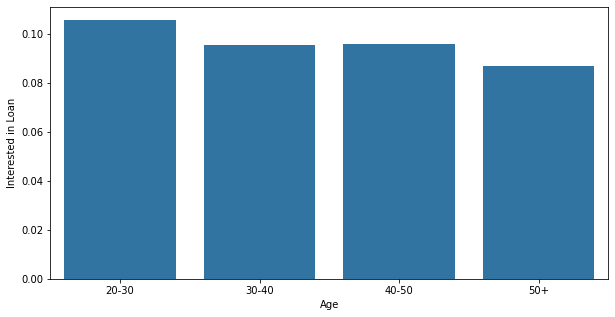

In [20]:
# 4. Create age groups
age_bins = [20, 30, 40, 50,60]
data['Age_Group'] = pd.cut(data['Age'], bins=age_bins, labels=['20-30', '30-40','40-50', '50+'])

# 4. Customers interested in loans
loan_age = data.groupby('Age_Group')['Personal_Loan'].mean()

# 4. Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=loan_age.index, y=loan_age.values)
plt.xlabel('Age')
plt.ylabel('Interested in Loan')
plt.show()


Here we see slightly higher loan interest in 20-30 age group. 30+ age group can indicate consistent interest for loans. 

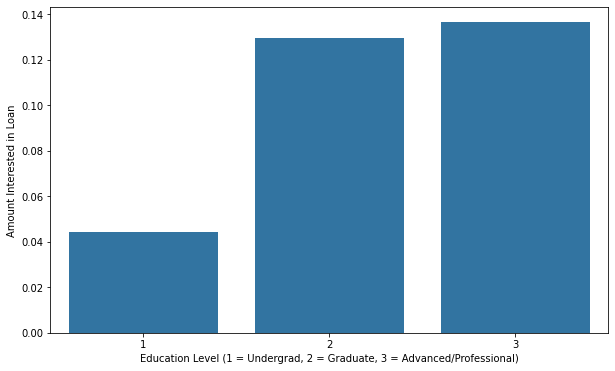

In [21]:
# 5. Customers loan interest based on education.
loan_education = data.groupby('Education')['Personal_Loan'].mean()

# 5. Plot the variation in loan interest by education level
plt.figure(figsize=(10, 6))
sns.barplot(x=loan_education.index, y=loan_education.values)
plt.xlabel('Education Level (1 = Undergrad, 2 = Graduate, 3 = Advanced/Professional)')
plt.ylabel('Amount Interested in Loan')
plt.show()

Here we can see that theres higher interest in 3.advance/professional degree having interest for loans.
* Is this due to education loans, personal lifestyle choices or career options?

## Model Building

### Model Evaluation Criterion

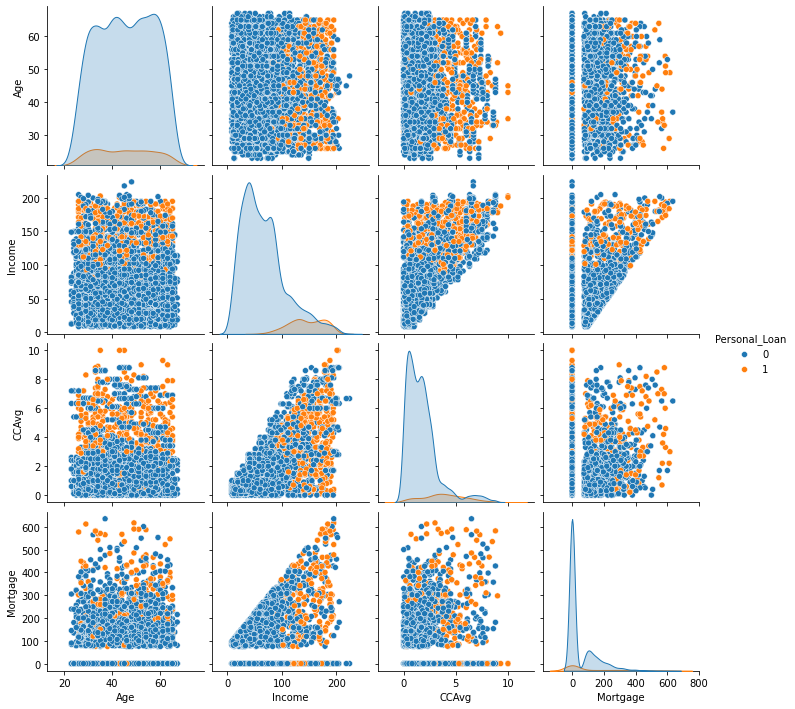

In [22]:
# Numerical variables relationships 
sns.pairplot(data[['Age', 'Income', 'CCAvg', 'Mortgage', 'Personal_Loan']], hue='Personal_Loan')
plt.show()

Pairplot:
- Higher income customers show a greater interest to accept personal loans, on the contrary, lower income are less likely to accept loans.
- Loan interest increases as CCAvg rises.
- Outliers exist in higher mortgage.

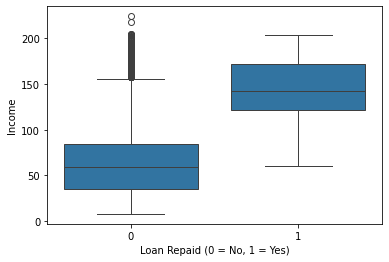

In [23]:
#Income Distribution by Loan Repayment Status
sns.boxplot(x='Personal_Loan', y='Income', data=data)
plt.xlabel('Loan Repaid (0 = No, 1 = Yes)')
plt.ylabel('Income')
plt.show()

- Higher income customers are more likely to repay loans.
- Outliers in the loan not repaid column may indicate that theres debt or other personal effects

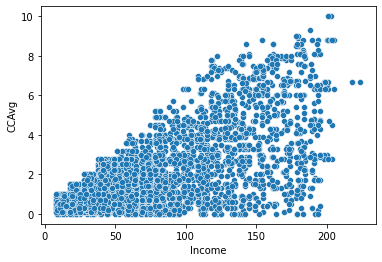

In [24]:
#Customer Segments Based on Income and CCAvg
sns.scatterplot(x='Income', y='CCAvg', data=data)
plt.xlabel('Income')
plt.ylabel('CCAvg')
plt.show()

- Scatterplot indicates higher CCAvg as income increases. 

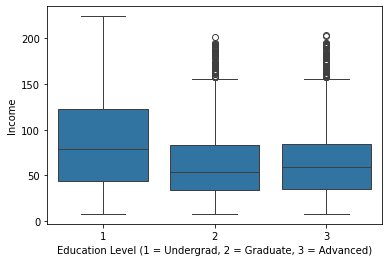

In [25]:
# Categorical vs Numerical 
sns.boxplot(x='Education', y='Income', data=data)
plt.xlabel('Education Level (1 = Undergrad, 2 = Graduate, 3 = Advanced)')
plt.ylabel('Income')
plt.show()

- Outliers indicate incomes above normal range for their education levels.
- Not an increase in income with higher level of education, this seems unexpected, however reality to employment.
- Median income similar among all levels of education.

## Model Performance Improvement

In [26]:
# setting X and y 
X = data.drop('Personal_Loan', axis=1)  
y = data['Personal_Loan']  
X = pd.get_dummies(X, columns=['Age_Group'], drop_first=True)  


In [27]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=30)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)
y_pred_prob = dt_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_prob))


Accuracy: 0.981
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       895
           1       0.91      0.91      0.91       105

    accuracy                           0.98      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.98      0.98      0.98      1000

AUC-ROC: 0.9515562649640861


- High scoring rates, strong performance
- The recall and F1-score for class 1 is 0.91, this can lead for room for improvement.

## Model Performance Comparison and Final Model Selection

In [28]:
# Pre-pruning with depth limit
pre_pruned_model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)
pre_pruned_model.fit(X_train, y_train)

# Evaluate pre-pruned model
y_pred_pruned = pre_pruned_model.predict(X_test)
print("Pre-Pruned Model Accuracy:", accuracy_score(y_test, y_pred_pruned))
print("Pre-Pruned Model Classification Report:\n", classification_report(y_test, y_pred_pruned))


Pre-Pruned Model Accuracy: 0.979
Pre-Pruned Model Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       895
           1       0.89      0.91      0.90       105

    accuracy                           0.98      1000
   macro avg       0.94      0.95      0.94      1000
weighted avg       0.98      0.98      0.98      1000



- Imbalance is shown with 895 vs 100, this can lead to over prunning or false results.

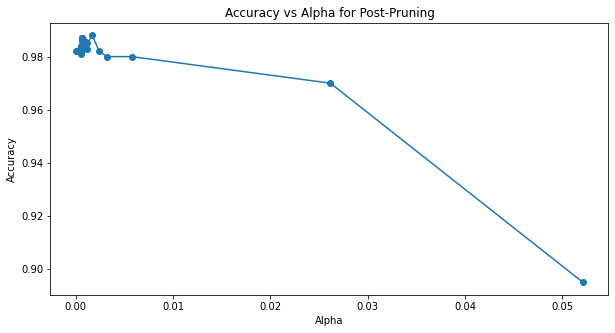

DecisionTreeClassifier(ccp_alpha=0.0016931576164524002, random_state=42)

In [29]:
# Train a full tree and get cost-complexity pruning path
path = dt_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Train models for each alpha
pruned_models = []
for alpha in ccp_alphas:
    pruned_model = DecisionTreeClassifier(ccp_alpha=alpha, random_state=42)
    pruned_model.fit(X_train, y_train)
    pruned_models.append(pruned_model)

# Evaluate models and find the best
model_scores = [accuracy_score(y_test, model.predict(X_test)) for model in pruned_models]

# Plot accuracy vs alpha
plt.figure(figsize=(10, 5))
plt.plot(ccp_alphas, model_scores, marker='o')
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Alpha for Post-Pruning")
plt.show()

# Select best model based on accuracy
best_alpha = ccp_alphas[model_scores.index(max(model_scores))]
final_pruned_model = DecisionTreeClassifier(ccp_alpha=best_alpha, random_state=42)
final_pruned_model.fit(X_train, y_train)


## Actionable Insights and Business Recommendations


 - What recommedations would you suggest to the bank? 


    - The pre-pruned model may be better for bank to be more efficient and follow risk control. However, the original model may be preferred for percisipn in apporving mroe loans.

        - Age does not seem to change loan interest, all ages tend to have interest.
        - Professional level does increase interest in loans, higher level of education more interest in loans.
        - Higher income indicates better repayment consistently


___